In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb 
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('newdata6features.csv', index_col=0)

<AxesSubplot:xlabel='acc_x', ylabel='acc_y'>

C:\Users\fatima\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


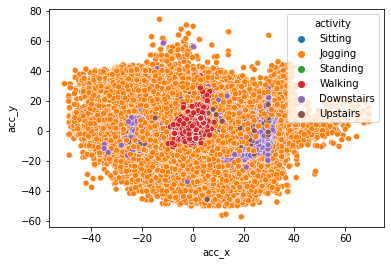

In [3]:
sb.scatterplot(x=data['acc_x'] , y=data['acc_y'] , hue=data['activity'])

<AxesSubplot:>

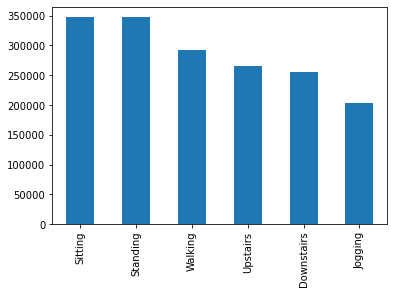

In [5]:
data.activity.value_counts().plot(kind='bar')

In [6]:
df=data.sample(frac=1).reset_index(drop=True)[0:50000]

In [7]:
x=df[['acc_x', 'acc_y', 'acc_z', 'rot_x', 'rot_y', 'rot_z']]
y=df[['activity']]

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y.head()

,activity
0,3
1,0
2,3
3,5
4,2


In [9]:
y.activity.unique()

array([3, 0, 5, 2, 1, 4])

In [10]:
y=y.values.reshape(y.shape[0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30 , random_state=100)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

model=svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score( y_test ,ypred )
acc